In [1]:
from itertools import cycle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from luminol.anomaly_detector import AnomalyDetector
from luminol.correlator import Correlator

In [2]:
df = pd.read_csv("../data/rastro_1min.tar.gz", parse_dates=[0], index_col=0)
df.head()

,overallusers,overallrbdw,overallrbdwmean,overallrbdwstd,overallratedw,overallratedwmean,overallratedwstd,overallmsgdw,overallretxdw,overallrbup,overallrbupmean,overallrbupstd,overallrateup,overallrateupmean,overallrateupstd,overallmsgup,overallretxup
overalltime,,,,,,,,,,,,,,,,,
2016-06-29 22:56:00,8.711864,1737.949153,19.737289,17.590780,4.610697e+05,3707.610350,4828.865308,60.033898,2.762712,1251.881356,3.443046,4.184972,150221.559322,434.507309,616.176033,180.135593,165.830508
2016-06-29 22:57:00,10.566667,975.183333,16.470517,15.334160,1.172443e+05,2017.145780,2984.791050,52.000000,1.216667,1407.983333,3.385373,3.600891,149476.666667,373.483436,468.323626,241.600000,187.216667
2016-06-29 22:58:00,14.816667,2018.716667,16.866703,14.328054,3.782617e+05,2655.061443,3775.325510,84.233333,2.650000,2899.116667,6.576329,5.829330,239384.266667,544.011478,561.241565,324.700000,111.933333
2016-06-29 22:59:00,11.166667,1754.000000,18.245522,15.004146,3.280561e+05,2672.386192,3300.962021,66.600000,2.950000,2041.966667,6.762097,5.491740,161850.133333,540.194010,469.583361,239.600000,56.200000
2016-06-29 23:00:00,10.661017,11046.406780,27.337623,13.555662,2.865999e+06,5919.297844,4132.723859,245.203390,18.983051,2109.101695,6.628143,6.706426,195703.457627,596.334224,698.955721,235.627119,78.542373


In [3]:
market = pd.date_range(start="2016/07/03 09:00:00", end="2016/08/01 00:00:00", freq="1w").tolist() + \
    pd.date_range(start="2016/07/03 16:00:00", end="2016/08/01 00:00:00", freq="1w").tolist()

In [4]:
ts = df.reset_index(inplace=False, drop=True).to_dict()
ts.keys()

dict_keys(['overallusers', 'overallrbdw', 'overallrbdwmean', 'overallrbdwstd', 'overallratedw', 'overallratedwmean', 'overallratedwstd', 'overallmsgdw', 'overallretxdw', 'overallrbup', 'overallrbupmean', 'overallrbupstd', 'overallrateup', 'overallrateupmean', 'overallrateupstd', 'overallmsgup', 'overallretxup'])

In [5]:
detectors = {k: AnomalyDetector(v) for k,v in ts.items()}
scores = {k: v.get_all_scores() for k,v in detectors.items()}
anomalies = {k: v.get_anomalies() for k,v in detectors.items()}

In [6]:
df_anomaly_score = pd.DataFrame({k:[i for i in v.itervalues()] for k,v in scores.items()}, index=df.index)
df_anomaly_score.head()

,overallusers,overallrbdw,overallrbdwmean,overallrbdwstd,overallratedw,overallratedwmean,overallratedwstd,overallmsgdw,overallretxdw,overallrbup,overallrbupmean,overallrbupstd,overallrateup,overallrateupmean,overallrateupstd,overallmsgup,overallretxup
overalltime,,,,,,,,,,,,,,,,,
2016-06-29 22:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-29 22:57:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-29 22:58:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-29 22:59:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-29 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
colors = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

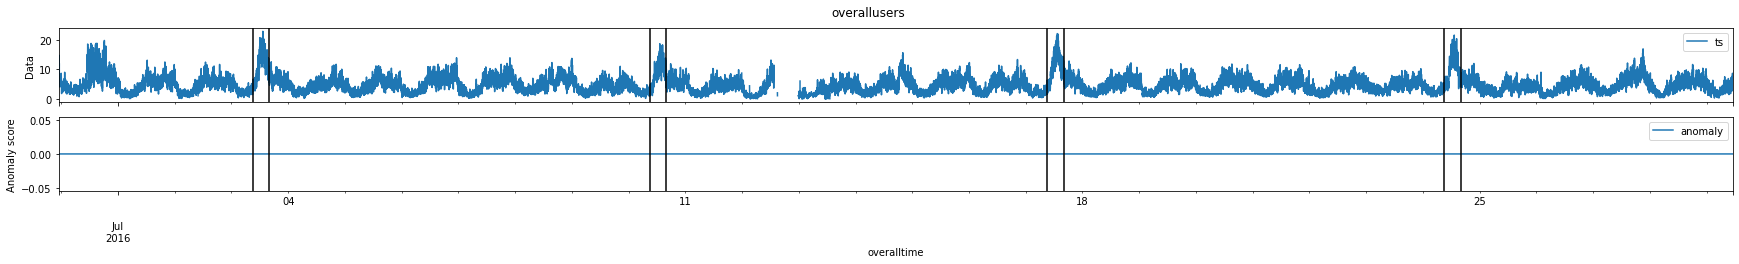

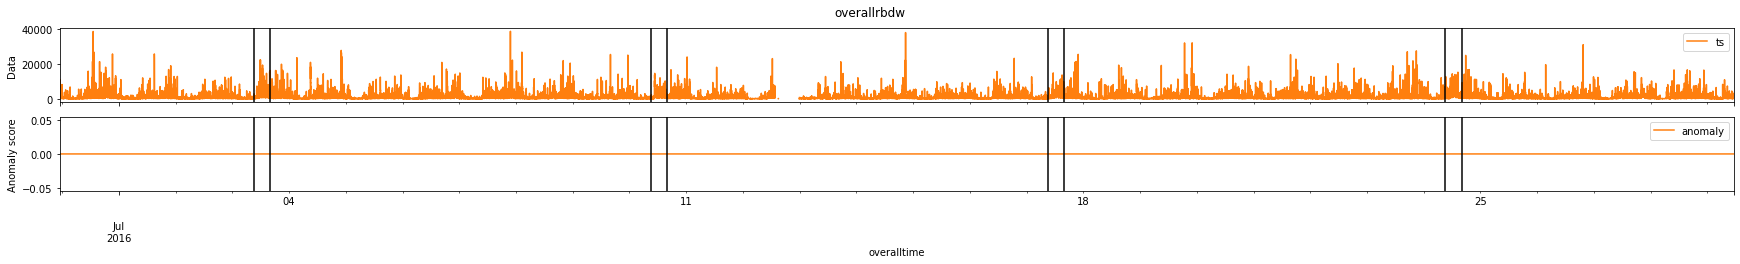

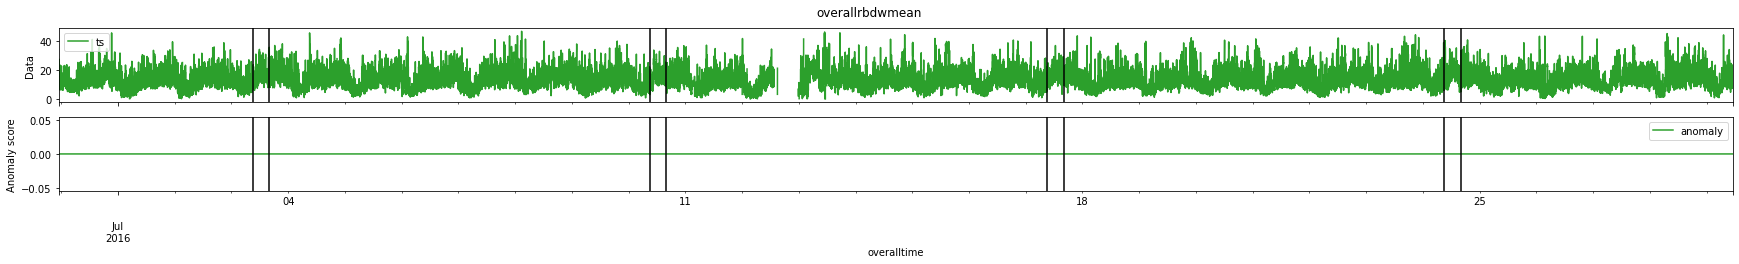

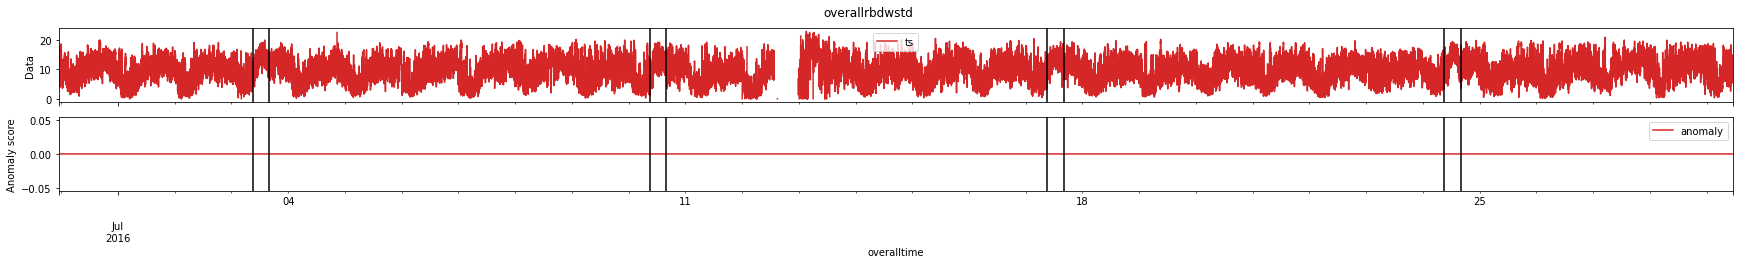

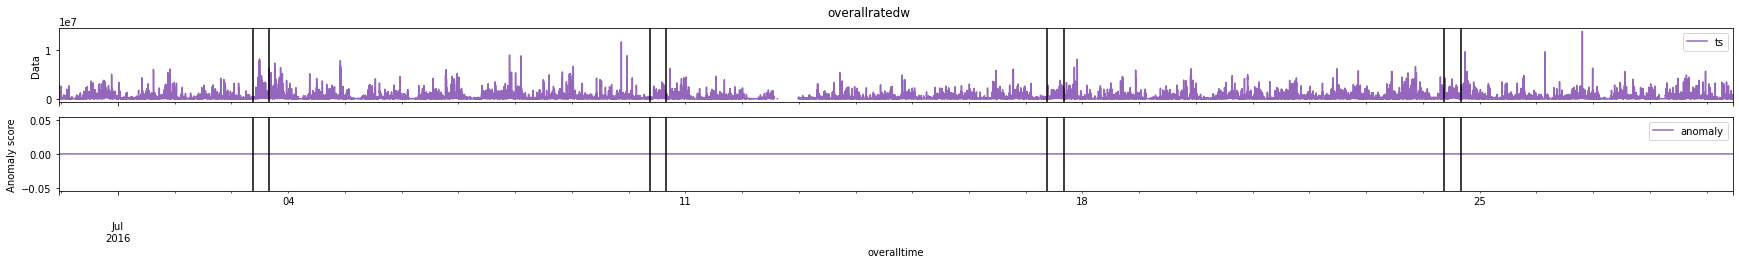

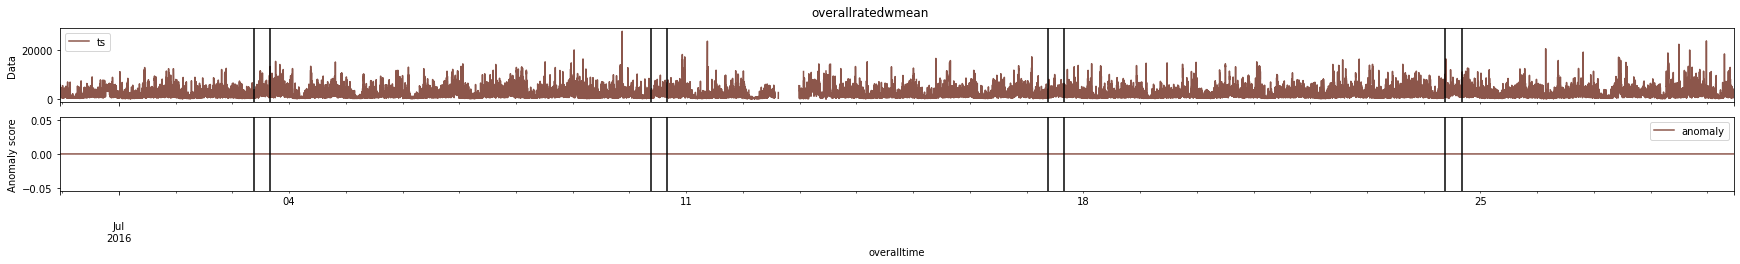

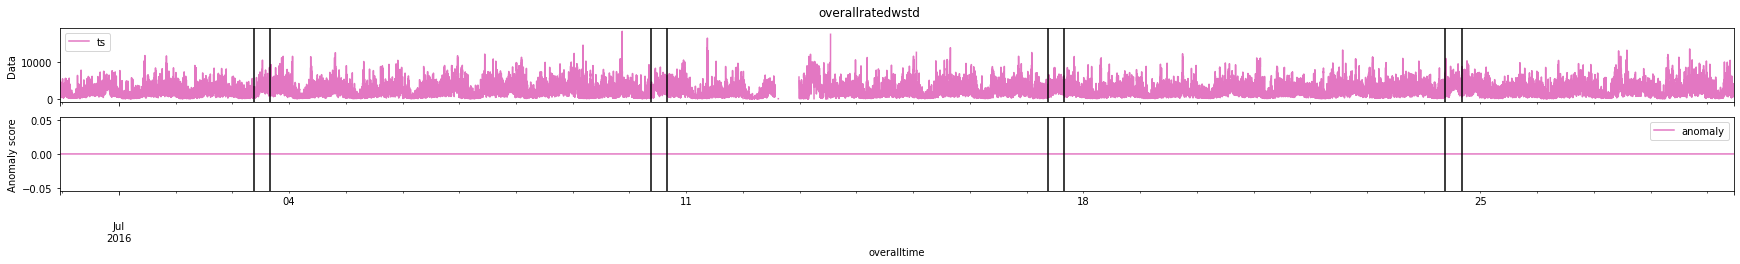

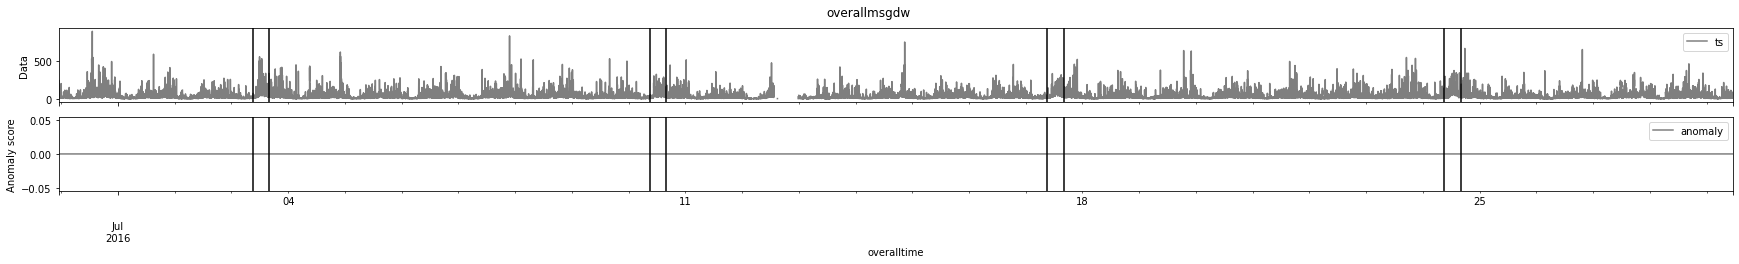

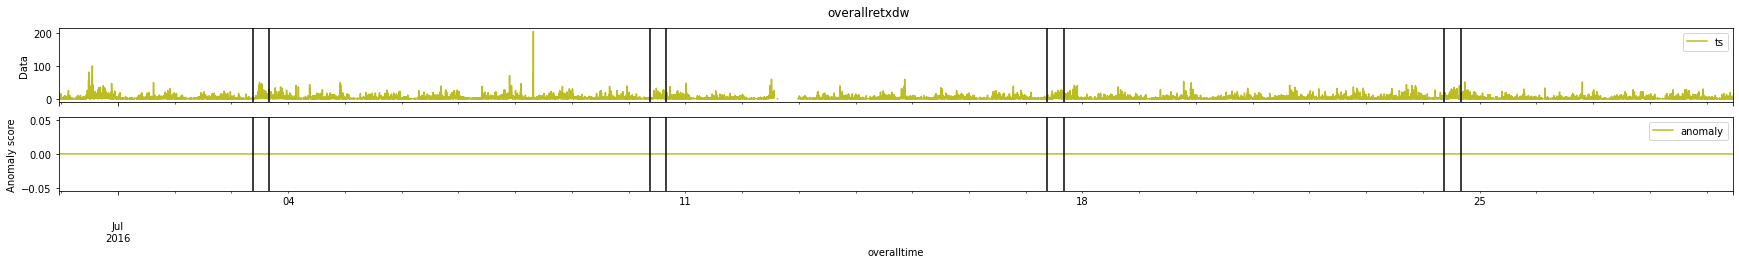

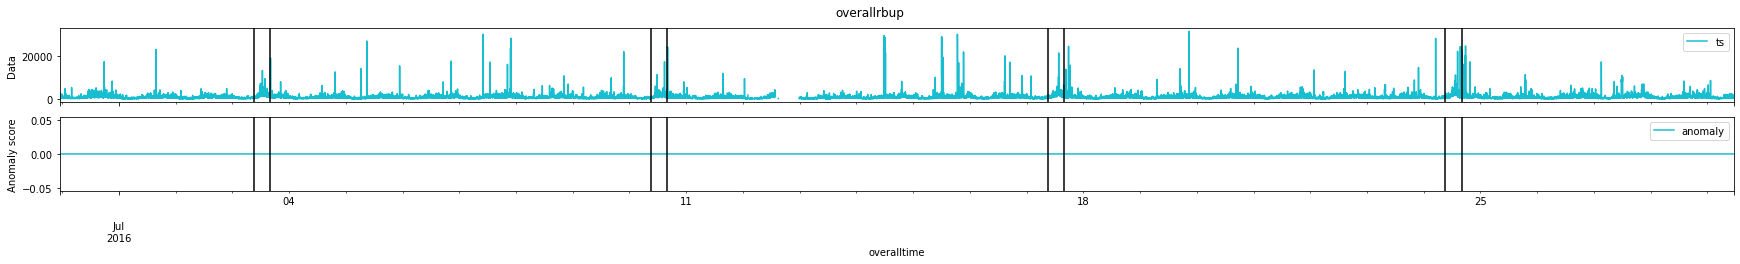

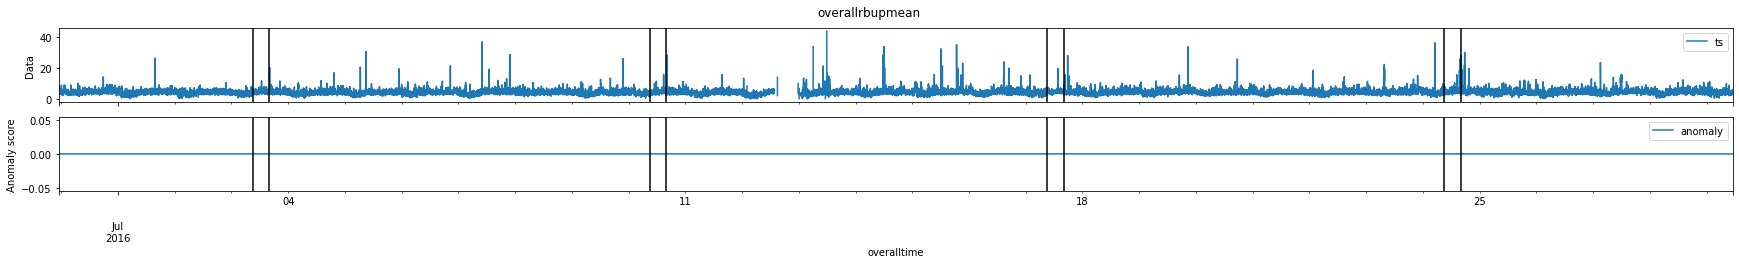

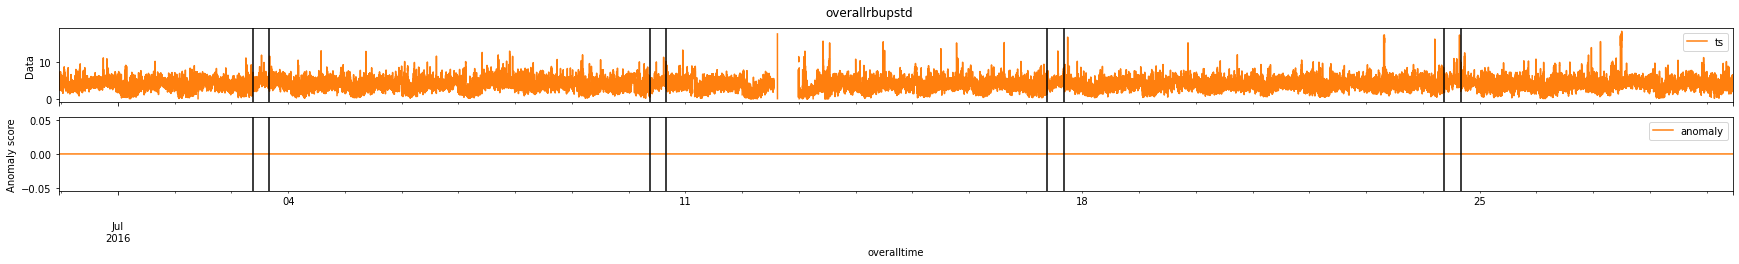

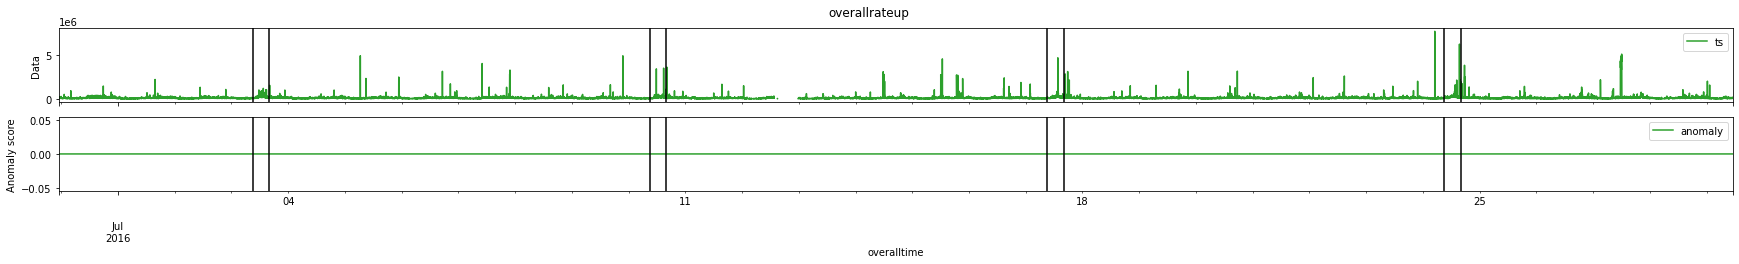

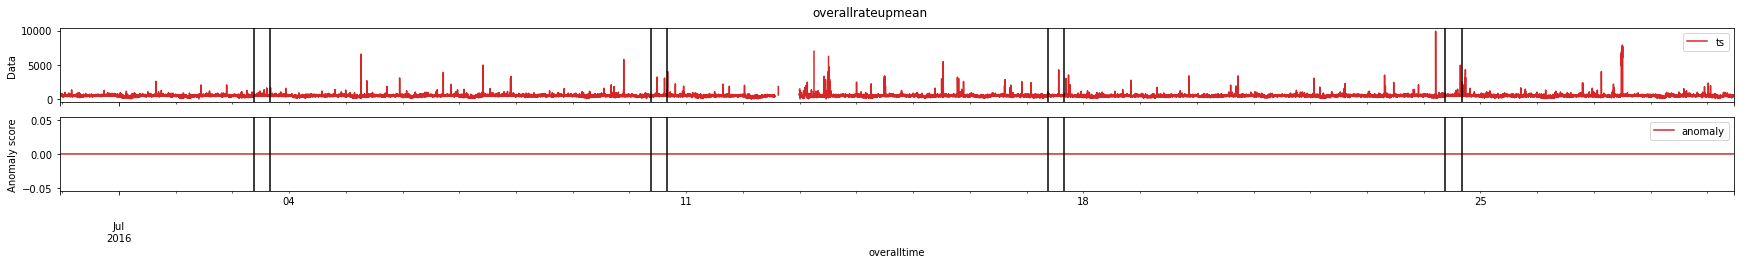

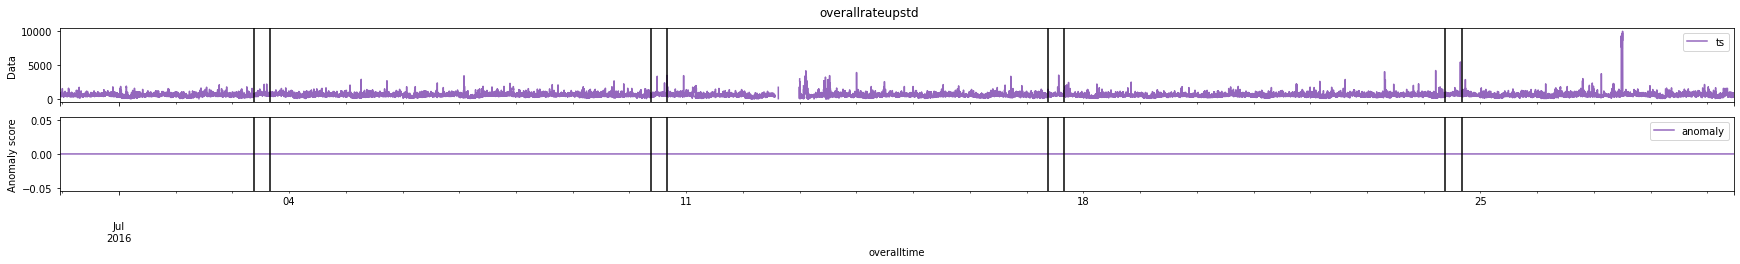

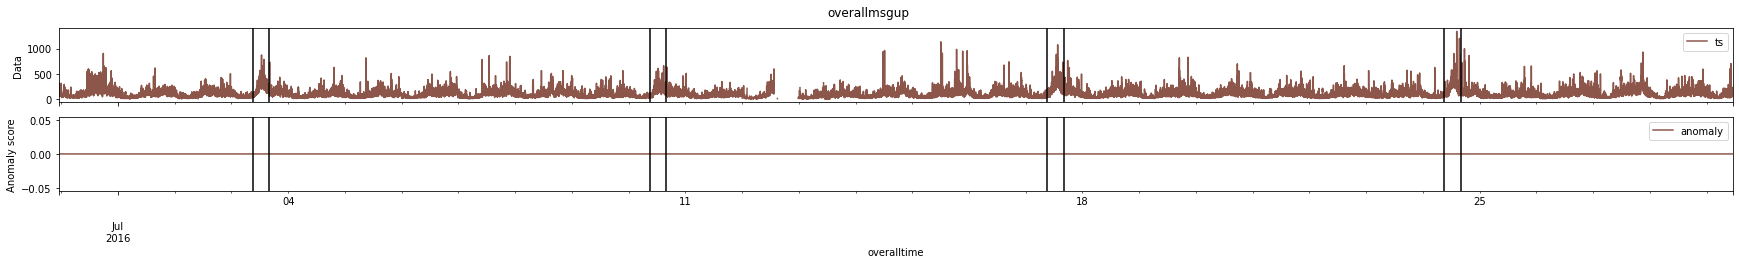

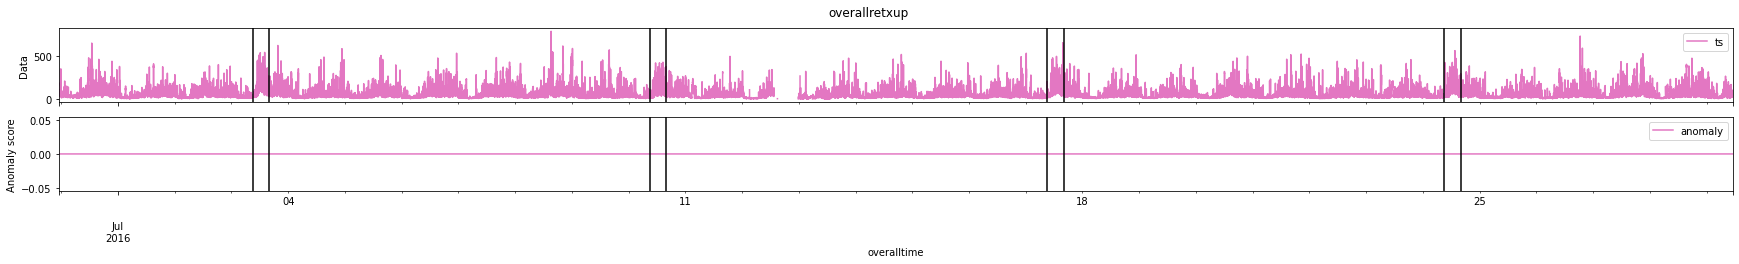

In [8]:
for c in df.columns:
    tmp = pd.DataFrame({"ts": df[c].tolist(), "anomaly":df_anomaly_score[c]}, index=df.index)
    axs = tmp.plot(subplots=True, sharex=True, figsize=(30,3), color=next(colors))
    for t in market:
        for ax in axs:
            ax.axvline(t, color="black", ls="-")
    axs[0].set_ylabel("Data")
    axs[1].set_ylabel("Anomaly score")
    fig = plt.gcf()
    fig.suptitle(c)
    plt.show()

In [9]:
df_anomaly_score.rename(columns={c:f"{c}_luminol" for c in df_anomaly_score.columns}, inplace=True)
df_anomaly_score.head()

,overallusers_luminol,overallrbdw_luminol,overallrbdwmean_luminol,overallrbdwstd_luminol,overallratedw_luminol,overallratedwmean_luminol,overallratedwstd_luminol,overallmsgdw_luminol,overallretxdw_luminol,overallrbup_luminol,overallrbupmean_luminol,overallrbupstd_luminol,overallrateup_luminol,overallrateupmean_luminol,overallrateupstd_luminol,overallmsgup_luminol,overallretxup_luminol
overalltime,,,,,,,,,,,,,,,,,
2016-06-29 22:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-29 22:57:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-29 22:58:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-29 22:59:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-29 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_anomaly_score.to_csv("../anomaly/luminol.tar.gz", index=True)